In [1]:
import numba as nb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.rcParams['figure.dpi'] = 300
import seaborn as sns
from scipy.interpolate import griddata
import os
import shutil
import moviepy as mp

In [17]:
SIM_NAME = 'Sim Neirenberg'

data = pd.read_csv('/Users/ainsleylewis/Documents/Astronomy/IllustrisTNG Lens Modelling/Simulations/Output/Neirenberg/Sim Neirenberg.csv', header=0)
data

m    n          o  num_images   pos_rms      mag_rms       chi2  \
0       230.0  0.0    3.63636           2  1.778287  3710.401500   5532.786   
1       230.0  0.0    0.00000           2  1.778287  3710.401500   5532.786   
2       230.0  0.0   10.90909           2  1.778287  3710.401500   5532.786   
3       230.0  0.0    7.27273           2  1.778287  3710.401500   5532.786   
4       230.0  0.0   14.54545           2  1.778287  3710.401500   5532.786   
...       ...  ...        ...         ...       ...          ...        ...   
999995  280.0  0.9  341.81818           4  1.981168     0.760967  19462.140   
999996  280.0  0.9  330.90909           4  2.766838     0.626000   7080.000   
999997  280.0  0.9  352.72727           3  1.287841     1.944633  17266.960   
999998  280.0  0.9  356.36364           3  1.374799     0.870333  17276.330   
999999  280.0  0.9  360.00000           3  2.532631     0.878200  17908.920   

        $\sigma$         x         y    e    $θ_{e}$  $r_{core}$  NaN  \
0          230.0 -0.140154 -0.158903  0.0    3.63636         0.0  0.0   
1          230.0 -0.140154 -0.158903  0.0    0.00000         0.0  0.0   
2          230.0 -0.140154 -0.158903  0.0   10.90909         0.0  0.0   
3          230.0 -0.140154 -0.158903  0.0    7.27273         0.0  0.0   
4          230.0 -0.140154 -0.158903  0.0   14.54545         0.0  0.0   
...          ...       ...       ...  ...        ...         ...  ...   
999995     280.0 -0.432652 -0.691292  0.9  341.81820         0.0  0.0   
999996     280.0  0.250233  0.310157  0.9  330.90910         0.0  0.0   
999997     280.0  0.727274  0.810863  0.9  352.72730         0.0  0.0   
999998     280.0  0.724491  0.818549  0.9  356.36360         0.0  0.0   
999999     280.0  0.656523  0.786397  0.9  360.00000         0.0  0.0   

        source_x  source_y  
0      -0.140312 -0.159123  
1      -0.140312 -0.159123  
2      -0.140312 -0.159123  
3      -0.140312 -0.159123  
4      -0.140312 -0.159123  
...          ...       ...  
999995 -0.698819 -0.090631  
999996 -0.130579 -0.128123  
999997  0.284401 -0.285533  
999998  0.392359 -0.210895  
999999  0.407932 -0.152961  

[1000000 rows x 16 columns]

In [18]:
data['pos_rms'] = data['pos_rms'].fillna(1)
data['mag_rms'] = data['mag_rms'].fillna(6000)

In [19]:
# Lowest chi2 value
min_chi2 = data['chi2'].min()
best_fit = data[data['chi2'] == min_chi2]
print("Best fit parameters:")
print(best_fit)

Best fit parameters:
                m        n          o  num_images   pos_rms   mag_rms  \
834638  271.91919  0.41818  145.45455           4  1.561259  2.299575   

            chi2  $\sigma$         x         y        e   $θ_{e}$  $r_{core}$  \
834638  14.76231  271.9192  0.005661  0.008829  0.41818  145.4546         0.0   

        NaN  source_x  source_y  
834638  0.0 -0.109093 -0.082787  


In [4]:
data4 = data[(data['num_images'] == 4)]
pos_sigma = 0.001
mag_sigma = 1
sigma = 20
datagood = data4[(data4['pos_rms'] < sigma*pos_sigma) & (data4['mag_rms'] < sigma*mag_sigma)]
datagood

Empty DataFrame
Columns: [m, n, o, num_images, pos_rms, mag_rms, chi2, $\sigma$, x, y, e, $θ_{e}$, $r_{core}$, NaN, source_x, source_y]
Index: []

In [72]:
data['$\\sigma$'].unique()
data = data[data['$\\sigma$'] == 279.495]

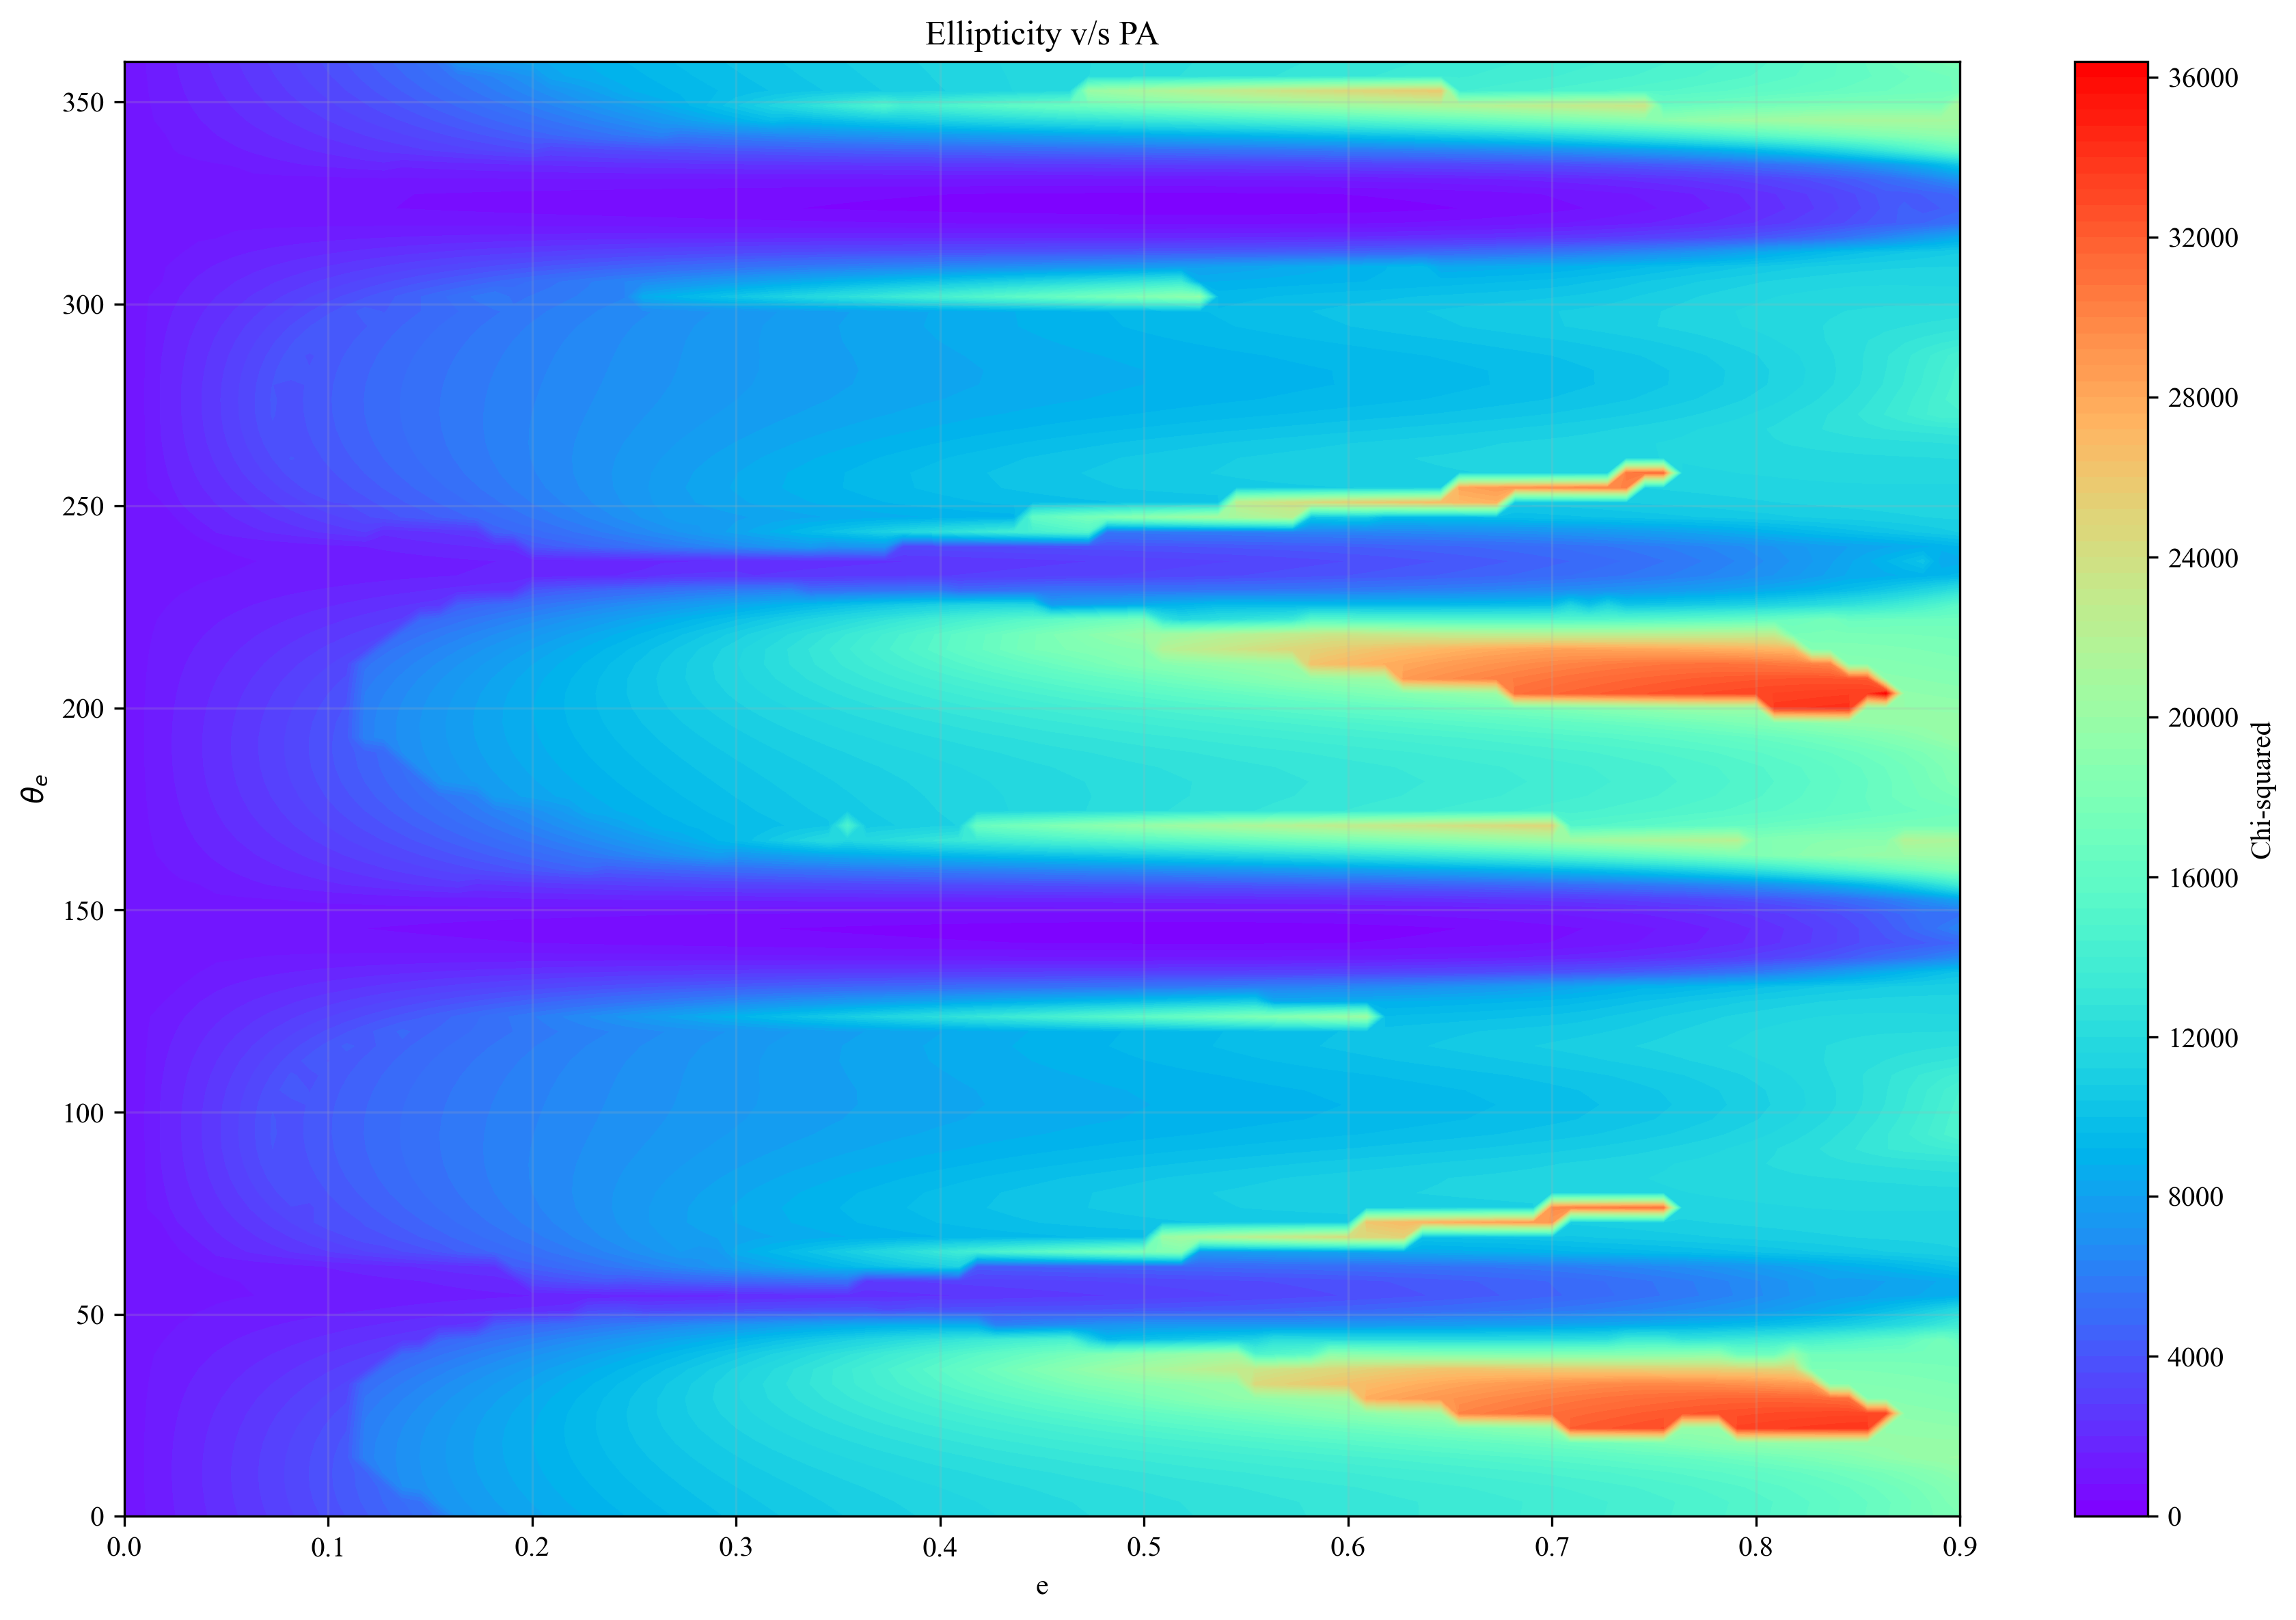

In [73]:
# Create a grid of x and y values
x = data['e'].values
y = data['$θ_{e}$'].values
z = data['chi2'].values

# Remove NaN values
mask = ~np.isnan(z)
x = x[mask]
y = y[mask]
z = z[mask]

# Create interpolation grid
xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolate z values on regular grid
zi = griddata((x, y), z, (xi, yi), method='cubic')

plt.figure(figsize=(12, 8))

# Create the contour plot using the same data
contour = plt.contourf(xi, yi, zi, levels=100, cmap='rainbow')

# Add a colorbar
plt.colorbar(contour, label='Chi-squared')

# Set labels and title
plt.xlabel('e', color = 'k')
plt.ylabel('$θ_{e}$', color = 'k')
plt.title('Ellipticity v/s PA', color = 'k')

# Set the style for dark theme
plt.grid(True, alpha=0.2)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

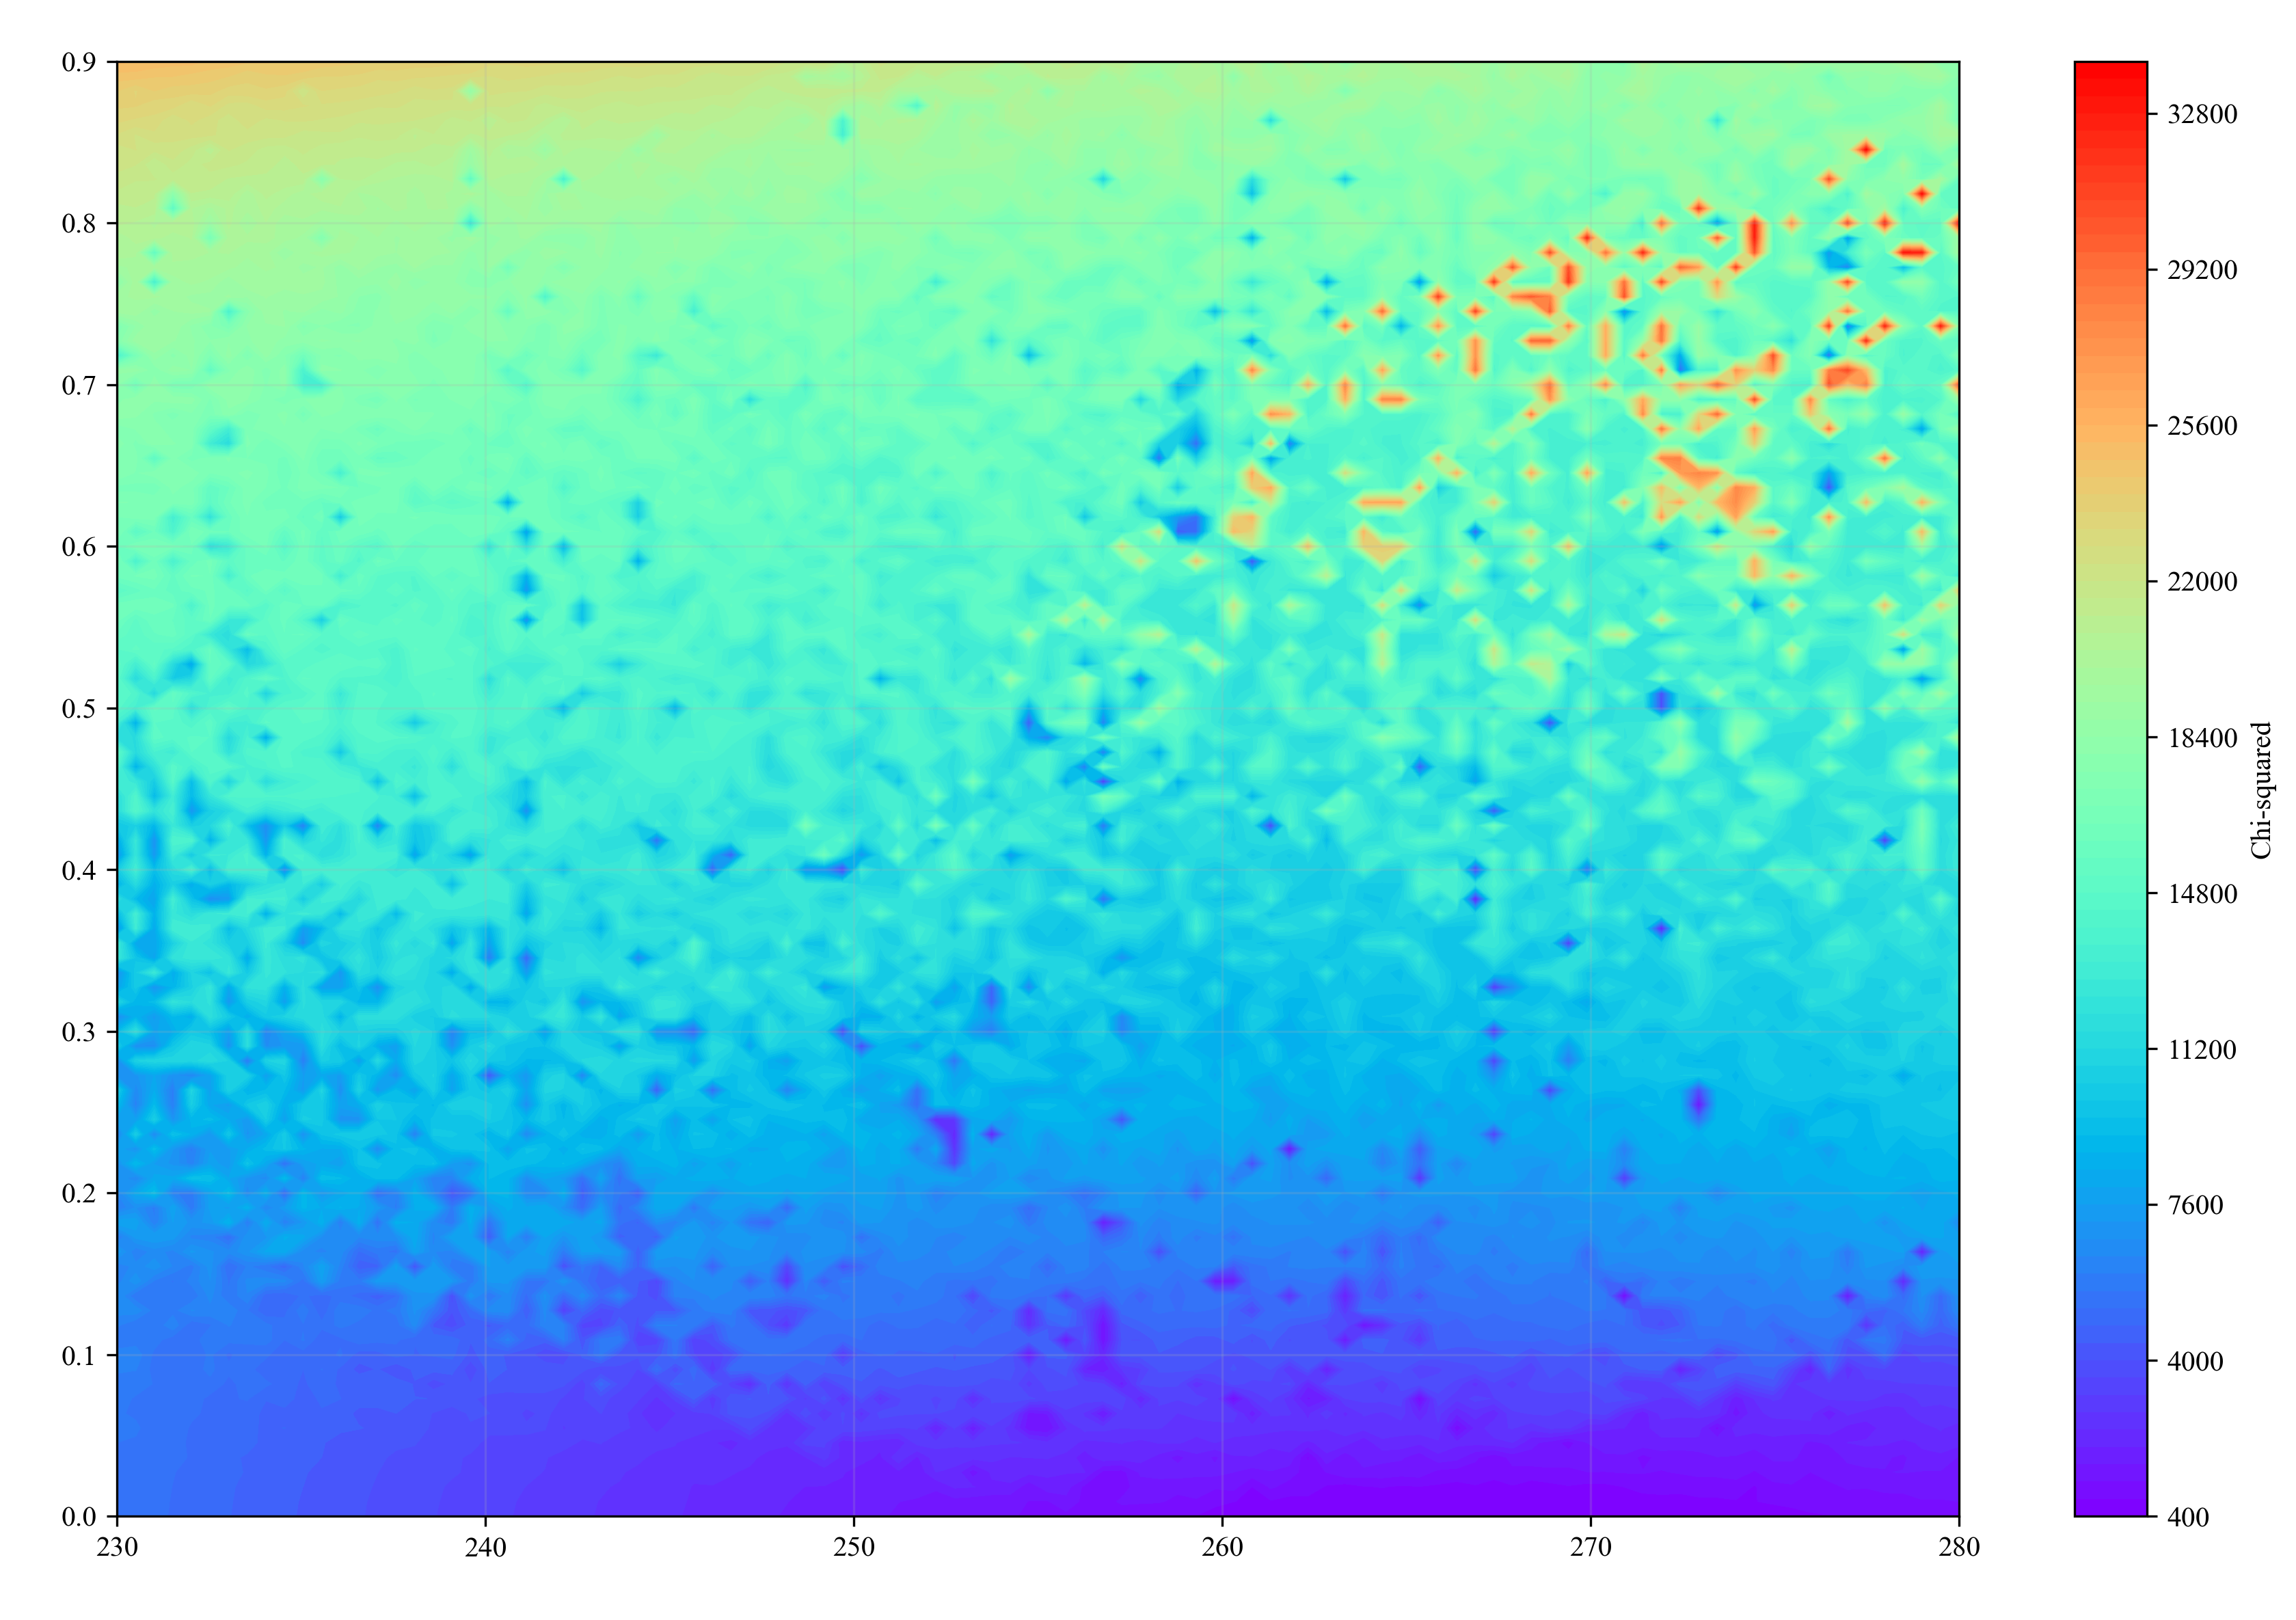

In [49]:
# Create a grid of x and y values
x = data['m'].values
y = data['n'].values
z = data['chi2'].values

# Remove NaN values
mask = ~np.isnan(z)
x = x[mask]
y = y[mask]
z = z[mask]

# Create interpolation grid
xi = np.linspace(x.min(), x.max(), 100)
yi = np.linspace(y.min(), y.max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolate z values on regular grid
zi = griddata((x, y), z, (xi, yi), method='cubic')

plt.figure(figsize=(12, 8))

# Create the contour plot using the same data
contour = plt.contourf(xi, yi, zi, levels=100, cmap='rainbow')

# Add a colorbar
plt.colorbar(contour, label='Chi-squared')

# Set labels and title
plt.xlabel('e', color = 'w')
plt.ylabel('$θ_{e}$', color = 'w')
plt.title('Ellipticity v/s PA', color = 'w')

# Set the style for dark theme
plt.grid(True, alpha=0.2)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [78]:
# --- Configuration ---
# Select the variables for the animation
variable_to_animate = '$\\sigma$' # Column to iterate over for each frame
x_variable = 'e'                  # Column for the x-axis
y_variable = '$θ_{e}$'             # Column for the y-axis
z_variable = 'chi2'            # Column for the color value (z-axis)
# --- End of Configuration ---


# --- The rest of the code is now general ---

# Create a directory to store the frames, named after the chosen variables
frames_dir = f'frames_contour_{z_variable}_vs_{x_variable}_{y_variable}_over_{variable_to_animate}'
if os.path.exists(frames_dir):
    shutil.rmtree(frames_dir) # Clean up previous frames
os.makedirs(frames_dir)

frame_files = []
values_to_iterate = sorted(data[variable_to_animate].unique())

# Determine the global range for the z-variable to keep the color bar consistent
z_min = data[z_variable].min()
z_max = data[z_variable].max()

for i, value in enumerate(values_to_iterate):
    data_subset = data[data[variable_to_animate] == value]

    # Skip if there's not enough data to create a grid
    if data_subset.shape[0] < 4:
        continue

    # Create a grid of x and y values
    x = data_subset[x_variable].values
    y = data_subset[y_variable].values
    z = data_subset[z_variable].values

    # Remove NaN values from the data
    mask = ~np.isnan(x) & ~np.isnan(y) & ~np.isnan(z)
    x, y, z = x[mask], y[mask], z[mask]
    
    # Skip if not enough valid data points for interpolation
    if len(x) < 4:
        continue

    # Create interpolation grid
    xi = np.linspace(x.min(), x.max(), 100)
    yi = np.linspace(y.min(), y.max(), 100)
    xi, yi = np.meshgrid(xi, yi)

    # Interpolate z values on regular grid
    zi = griddata((x, y), z, (xi, yi), method='cubic')

    # Create the plot
    plt.figure(figsize=(12, 8))
    # Create the contour plot using the interpolated data
    # Use vmin and vmax to set a consistent color scale across all frames
    contour = plt.contourf(xi, yi, zi, levels=100, cmap='rainbow', vmin=0.0, vmax=1e6)

    # Add a colorbar with the consistent range
    plt.colorbar(contour, label=z_variable)
    
    # Set labels and title dynamically
    plt.xlabel(x_variable)
    plt.ylabel(y_variable)
    plt.title(f'{z_variable} vs. {x_variable} and {y_variable} for {variable_to_animate} = {value:.2f}')
    plt.grid(True, alpha=0.2)
    plt.tight_layout()

    # Save the frame
    frame_path = os.path.join(frames_dir, f"frame_{i:04d}.png")
    plt.savefig(frame_path)
    plt.close()  # Close the plot to free memory
    frame_files.append(frame_path)

# Create the video from the frames
if frame_files:
    clip = mp.ImageSequenceClip(frame_files, fps=10) # Adjusted fps for better viewing
    video_filename = f'{SIM_NAME}_{z_variable}_vs_{x_variable}_{y_variable}_over_{variable_to_animate}_animation.mp4'
    clip.write_videofile(video_filename, codec='libx264')
    print(f"Video saved as {video_filename}")

    # Clean up the frames directory
    shutil.rmtree(frames_dir)
else:
    print("No frames were generated to create a video.")

MoviePy - Building video System 1 Combined_combined_chi2_vs_e_$θ_{e}$_over_$\sigma$_animation.mp4.
MoviePy - Writing video System 1 Combined_combined_chi2_vs_e_$θ_{e}$_over_$\sigma$_animation.mp4



MoviePy - Done !
MoviePy - video ready System 1 Combined_combined_chi2_vs_e_$θ_{e}$_over_$\sigma$_animation.mp4
Video saved as System 1 Combined_combined_chi2_vs_e_$θ_{e}$_over_$\sigma$_animation.mp4


In [52]:
# Select the variable to iterate over for the animation
variable_to_animate = '$\sigma$'

# Select the variable to plot the KDE for
variable_to_plot = 'pos_rms' # e.g., 'pos_rms', 'mag_rms', 'chi2'

# --- The rest of the code is now general ---

# Create a directory to store the frames, named after the chosen variables
frames_dir = f'frames_kde_{variable_to_plot}_vs_{variable_to_animate}'
if os.path.exists(frames_dir):
    shutil.rmtree(frames_dir) # Clean up previous frames
os.makedirs(frames_dir)

frame_files = []
values = sorted(data[variable_to_animate].unique())

# Determine the global range for the plotted variable to keep the x-axis consistent
plot_var_min = data[variable_to_plot].min()
plot_var_max = data[variable_to_plot].max()

for i, value in enumerate(values):
    # Filter data for the current value of the chosen animation variable
    data_subset = data[data[variable_to_animate] == value]

    # Skip if there's not enough data
    if data_subset.empty:
        continue

    plt.figure(figsize=(8, 4))
    sns.kdeplot(data_subset[variable_to_plot], fill=True)
    
    # Set labels and a dynamic title
    plt.title(f'KDE of {variable_to_plot} for {variable_to_animate} = {value:.2f}')
    plt.xlabel(variable_to_plot)
    plt.ylabel('Density')
    plt.xlim(0.0, 0.005) # Keep x-axis consistent
    plt.grid(True, alpha=0.2)
    plt.tight_layout()

    # Save the frame
    frame_path = os.path.join(frames_dir, f"frame_{i:04d}.png")
    plt.savefig(frame_path)
    plt.close()  # Close the plot to free memory
    frame_files.append(frame_path)

# Create the video from the frames
if frame_files:
    clip = mp.ImageSequenceClip(frame_files, fps=10) # Slower fps for better viewing
    video_filename = f'{SIM_NAME}_kde_{variable_to_plot}_vs_{variable_to_animate}_animation.mov'
    clip.write_videofile(video_filename, codec='libx264')
    print(f"Video saved as {video_filename}")

    # Clean up the frames directory
    shutil.rmtree(frames_dir)
else:
    print("No frames were generated to create a video.")

MoviePy - Building video Sim Neirenberg_kde_pos_rms_vs_$\sigma$_animation.mov.
MoviePy - Writing video Sim Neirenberg_kde_pos_rms_vs_$\sigma$_animation.mov



MoviePy - Done !
MoviePy - video ready Sim Neirenberg_kde_pos_rms_vs_$\sigma$_animation.mov
Video saved as Sim Neirenberg_kde_pos_rms_vs_$\sigma$_animation.mov


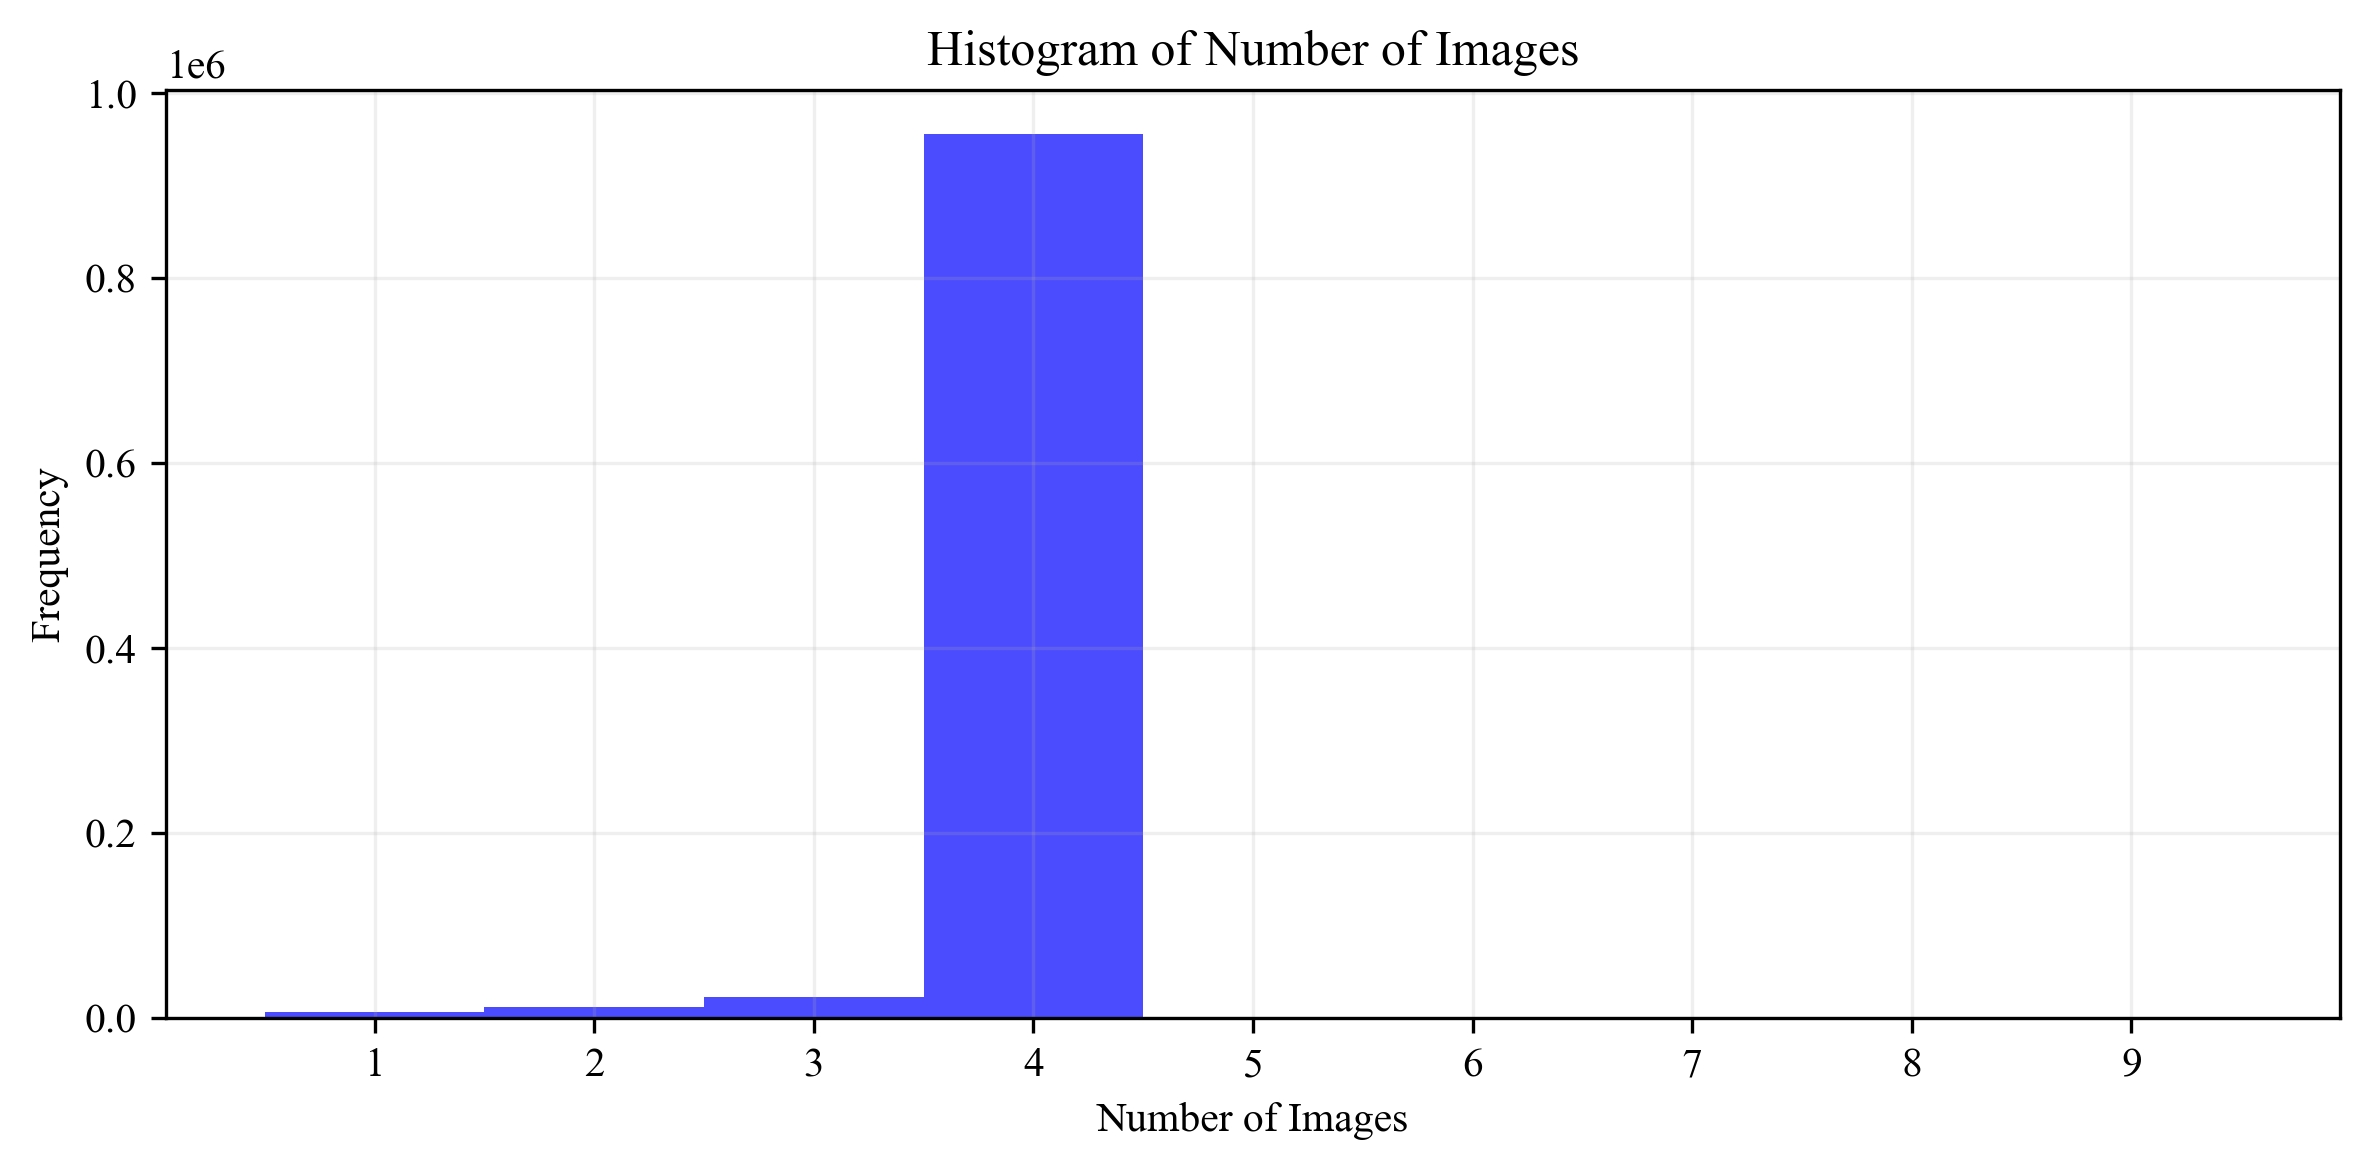

In [78]:
plt.figure(figsize=(8, 4))
plt.hist(data['num_images'], bins=range(1, 11), align='left', color='blue', alpha=0.7)
plt.xticks(range(1, 10))
plt.title('Histogram of Number of Images')
plt.xlabel('Number of Images')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()

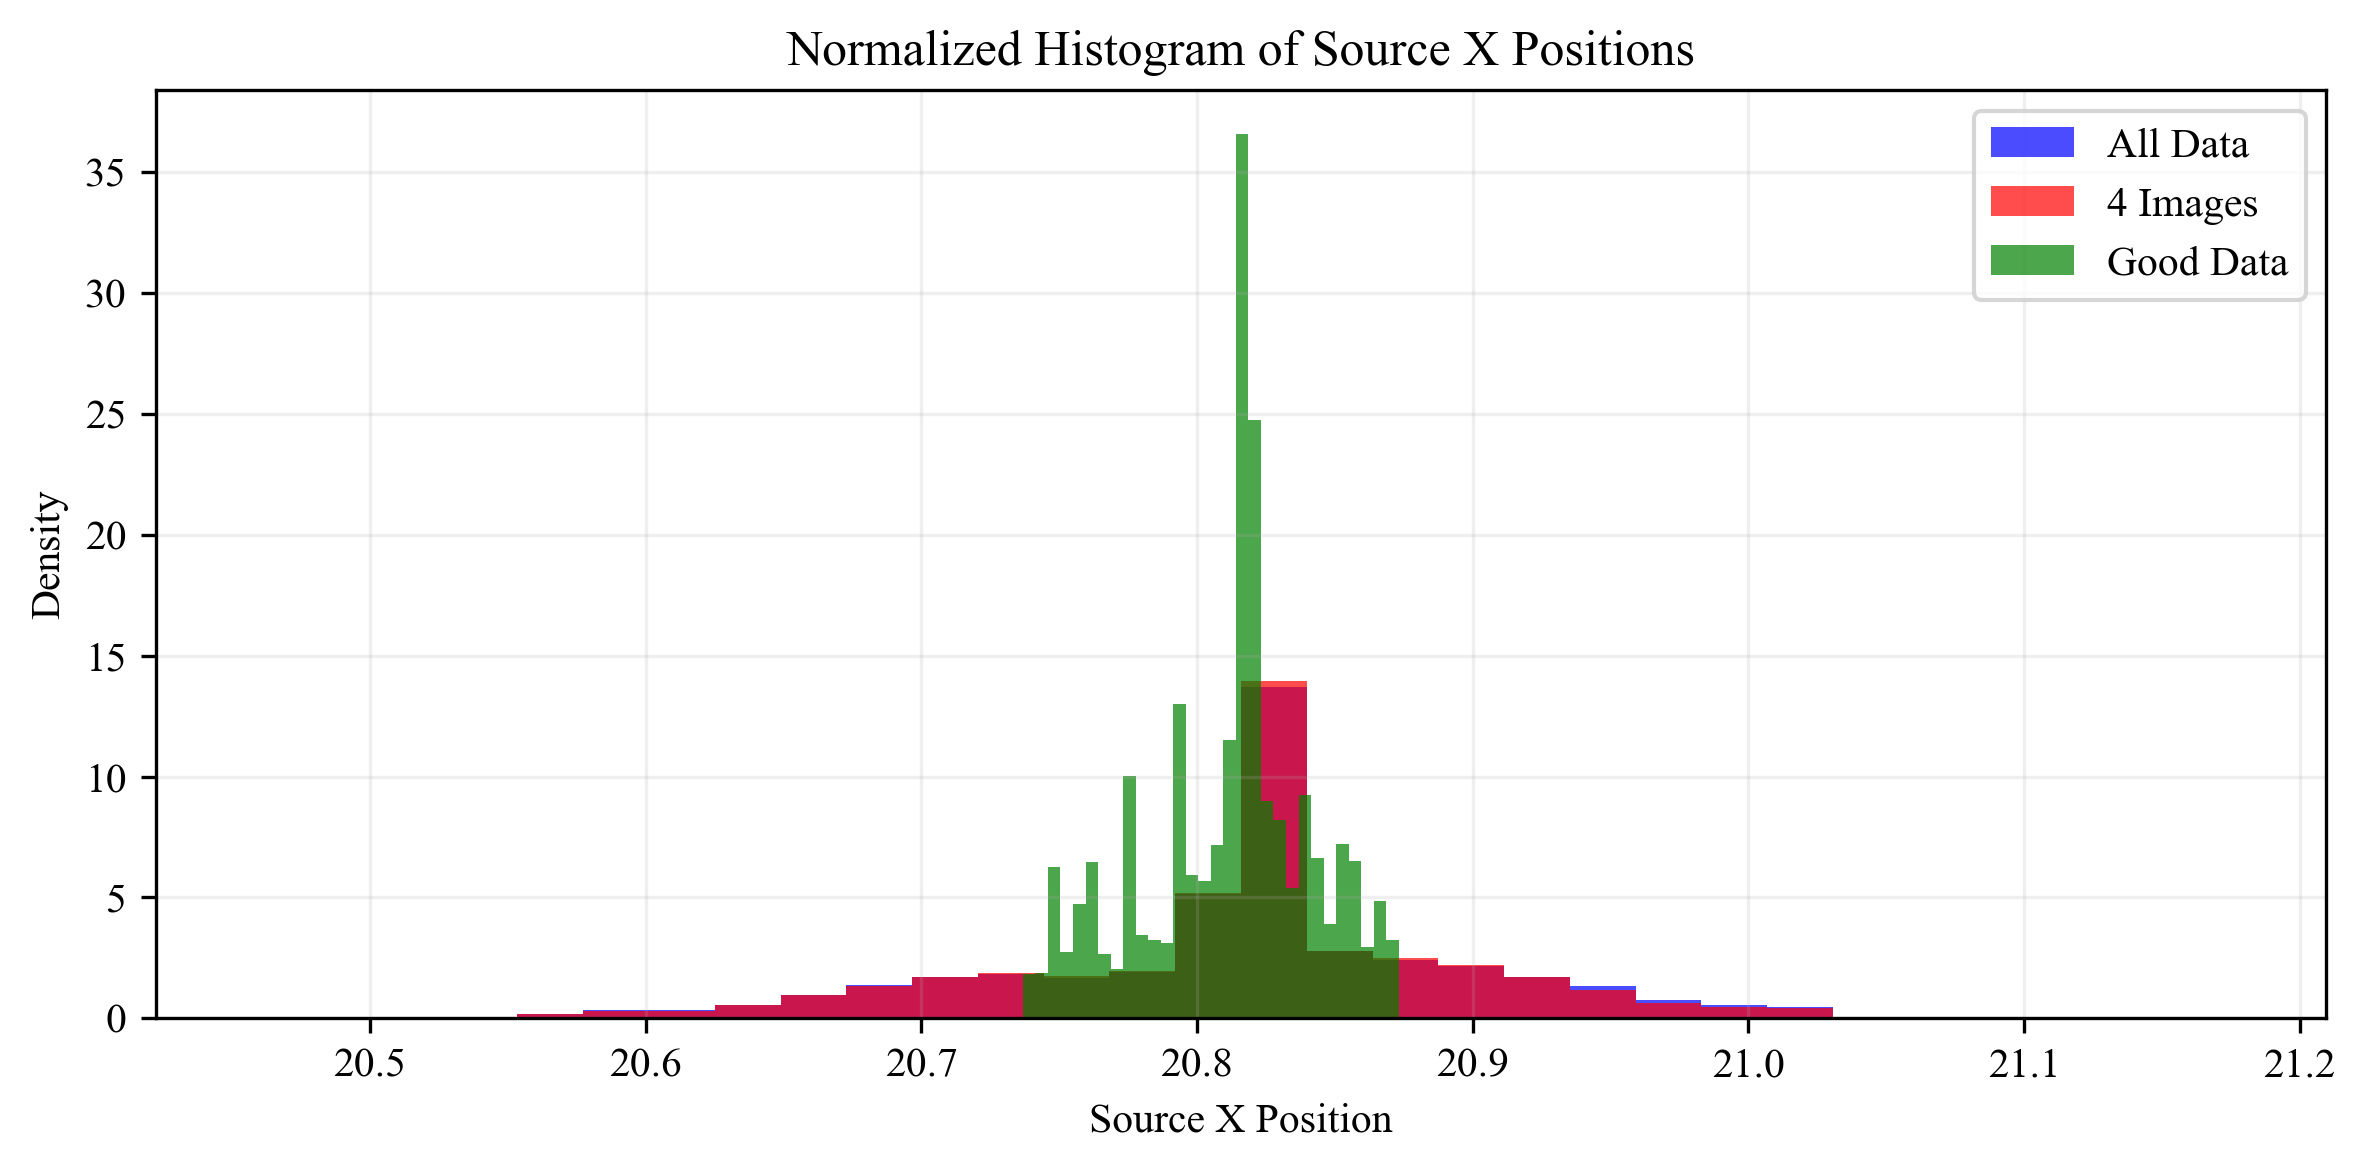

In [92]:
plt.figure(figsize=(8, 4))
plt.hist(data['source_x'], bins=30, color='blue', alpha=0.7, label='All Data', density=True)
plt.hist(data4['source_x'], bins=30, color='red', alpha=0.7, label='4 Images', density=True)
plt.hist(datagood['source_x'], bins=30, color='green', alpha=0.7, label='Good Data', density=True)
plt.title('Normalized Histogram of Source X Positions')
plt.xlabel('Source X Position')
plt.ylabel('Density')
plt.legend()
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()

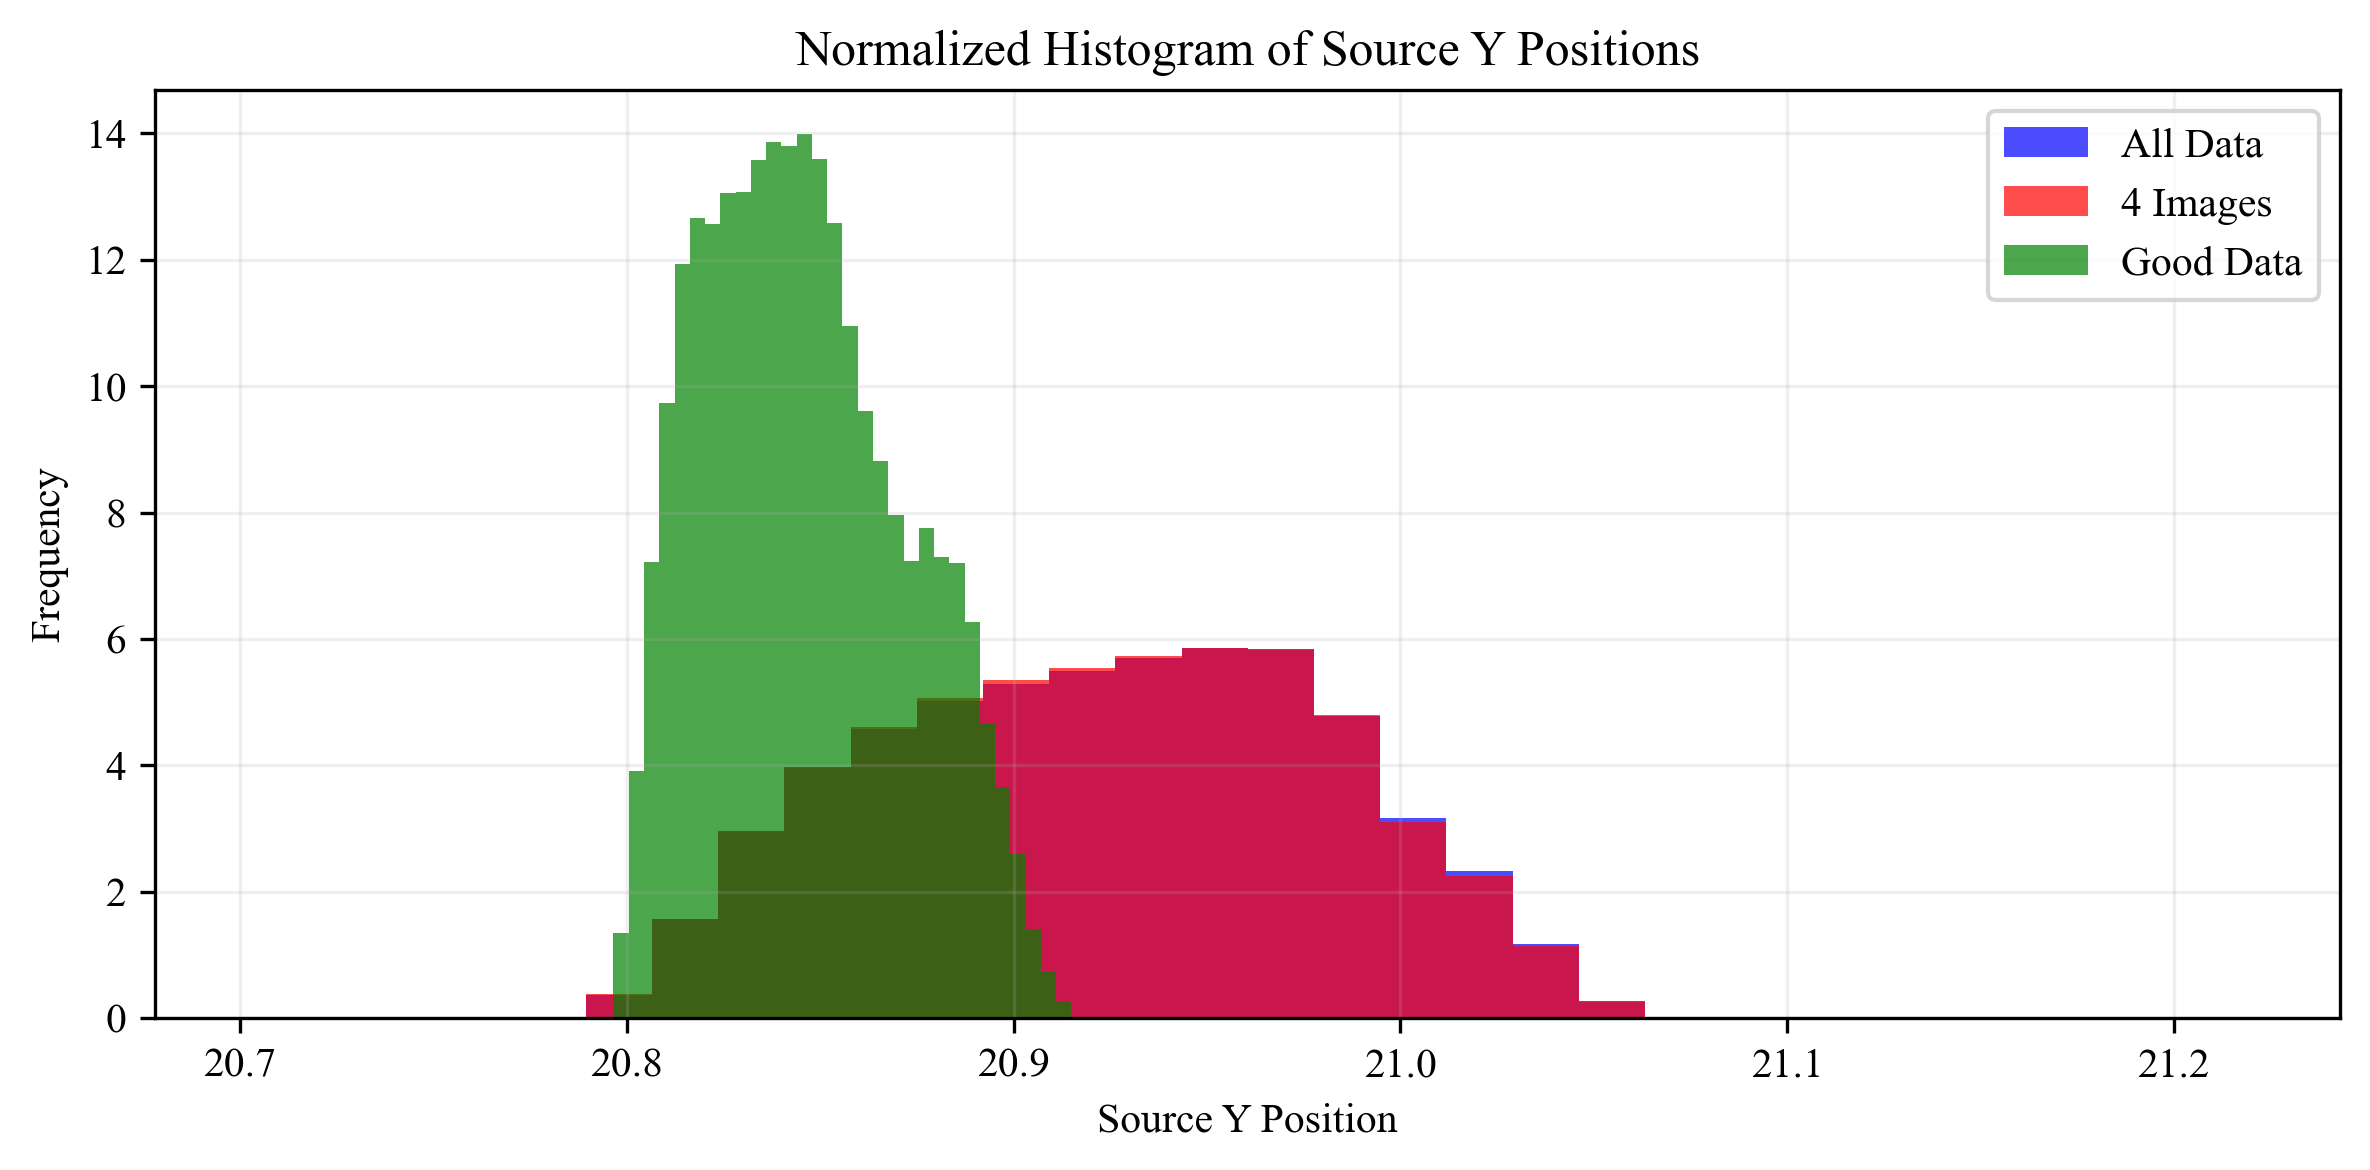

In [95]:
plt.figure(figsize=(8, 4))
plt.hist(data['source_y'], bins=30, color='blue', alpha=0.7, density=True, label='All Data')
plt.hist(data4['source_y'], bins=30, color='red', alpha=0.7, density=True, label='4 Images')
plt.hist(datagood['source_y'], bins=30, color='green', alpha=0.7, density=True, label='Good Data')
plt.title('Normalized Histogram of Source Y Positions')
plt.xlabel('Source Y Position')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()

In [108]:
x_variable = 'e'
y_variable = '$θ_{e}$'
z_variable = '$\sigma$'
color_variable = 'chi2'
variable_to_animate = 'e' # The variable whose unique values will define the frames

fps = 10 # Frames per second for the output video. Adjust for desired speed.
# --- End of Configuration ---


# --- The rest of the code is now general ---

# Create a directory to store the frames
frames_dir = f'frames_3D_{color_variable}_vs_{x_variable}_{y_variable}_{z_variable}_over_{variable_to_animate}'
if os.path.exists(frames_dir):
    shutil.rmtree(frames_dir) # Clean up previous frames
os.makedirs(frames_dir)

# Determine global ranges for axes and color to keep the plot consistent
x_min, x_max = data[x_variable].min(), data[x_variable].max()
y_min, y_max = data[y_variable].min(), data[y_variable].max()
z_min, z_max = data[z_variable].min(), data[z_variable].max()
color_min, color_max = data[color_variable].min(), data[color_variable].max()

# Get the unique values to iterate over
values_to_iterate = sorted(data[variable_to_animate].unique())
print(f"Found {len(values_to_iterate)} unique values of '{variable_to_animate}' to animate.")

frame_files = []
print("Generating frames...")

for i, value in enumerate(values_to_iterate):
    # Filter the data to get points ONLY for the current unique value
    data_subset = data[data[variable_to_animate] == value]

    # Skip if there's no data for this value
    if data_subset.empty:
        continue

    # --- Create the 3D Plot for the current frame ---
    fig = plt.figure(figsize=(12, 9))
    ax = fig.add_subplot(111, projection='3d')

    # Create the 3D scatter plot
    scatter = ax.scatter(
        data_subset[x_variable],
        data_subset[y_variable],
        data_subset[z_variable],
        c=data_subset[color_variable],
        cmap='viridis',
        vmin=color_min,
        vmax=color_max,
        s=50 # Marker size
    )

    # Set labels and title dynamically
    ax.set_xlabel(x_variable)
    ax.set_ylabel(y_variable)
    ax.set_zlabel(z_variable)
    ax.set_title(f'{variable_to_animate} = {value:.3f}')

    # Set consistent axis limits for all frames
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_zlim(z_min, z_max)

    # Add a color bar
    cbar = fig.colorbar(scatter, shrink=0.7)
    cbar.set_label(color_variable)

    # Set a consistent viewing angle
    ax.view_init(elev=25., azim=45)
    plt.tight_layout()

    # Save the frame
    frame_path = os.path.join(frames_dir, f"frame_{i:04d}.png")
    plt.savefig(frame_path)
    plt.close(fig)  # Close the plot to free memory
    frame_files.append(frame_path)

print(f"Generated {len(frame_files)} frames.")

# Create the video from the frames
if frame_files:
    video_filename = f'{SIM_NAME}_{color_variable}_vs_{x_variable}_{y_variable}_{z_variable}_over_{variable_to_animate}.mp4'
    clip = mp.ImageSequenceClip(frame_files, fps=fps)
    clip.write_videofile(video_filename, codec='libx264')
    print(f"\nVideo saved as {video_filename}")

    # Clean up the frames directory
    shutil.rmtree(frames_dir)
else:
    print("No frames were generated, so no video was created.")

Found 100 unique values of 'e' to animate.
Generating frames...
Generated 100 frames.
MoviePy - Building video Sim 1_chi2_vs_e_$θ_{e}$_$\sigma$_over_e.mp4.
MoviePy - Writing video Sim 1_chi2_vs_e_$θ_{e}$_$\sigma$_over_e.mp4



MoviePy - Done !
MoviePy - video ready Sim 1_chi2_vs_e_$θ_{e}$_$\sigma$_over_e.mp4

Video saved as Sim 1_chi2_vs_e_$θ_{e}$_$\sigma$_over_e.mp4


In [112]:
# --- Configuration ---
x_variable = 'e'
y_variable = '$θ_{e}$'
z_variable = '$\sigma$'
color_variable = 'chi2'
fps = 24 # Frames per second for the output video
grid_size = 100
# --- End of Configuration ---


# --- CRITICAL FIX: Prepare Grid Indices ---
# This section adds the 'i', 'j', 'k' columns required for the diagonal slice.
# It assumes your data is ordered like a C-style (row-major) array,
# which is the standard way to flatten a 3D grid.

print("Preparing grid indices...")
if len(data) != grid_size**3:
    raise ValueError(f"Data length is {len(data)} but expected a {grid_size}x{grid_size}x{grid_size} grid ({grid_size**3} rows).")

# Generate the 3D index arrays
i, j, k = np.indices((grid_size, grid_size, grid_size))

# Flatten the arrays and add them as columns to your DataFrame
data['i'] = i.flatten()
data['j'] = j.flatten()
data['k'] = k.flatten()

print("Grid indices added successfully.")
# --- End of Fix ---


# --- Animation Setup ---

# Create a directory to store the frames
frames_dir = f'frames_2D_cross_section'
if os.path.exists(frames_dir):
    shutil.rmtree(frames_dir)
os.makedirs(frames_dir)

# Determine global range for the color bar to keep it consistent
color_min, color_max = data[color_variable].min(), data[color_variable].max()

# The animation will iterate through the sum of the grid indices
max_index_sum = (grid_size - 1) * 3
animation_range = range(max_index_sum + 1)

# Define the 2D projection vectors for the triangular plot
proj_x_vec = np.array([1, 0])
proj_y_vec = np.array([-0.5, 0.866]) # 120 degrees from x
proj_z_vec = np.array([-0.5, -0.866]) # 240 degrees from x

frame_files = []
print(f"Generating {len(animation_range)} frames...")

# --- Main Animation Loop ---

for slice_index_sum in animation_range:
    # Filter data for the current diagonal slice using grid indices
    data_subset = data[data['i'] + data['j'] + data['k'] == slice_index_sum]

    if data_subset.empty:
        continue

    # --- Create the 2D Cross-Section Plot ---
    fig, ax = plt.subplots(figsize=(10, 10))

    # Project the 3D data onto the 2D triangular plane
    points_i = data_subset['i'].values
    points_j = data_subset['j'].values
    points_k = data_subset['k'].values
    
    total_indices = points_i + points_j + points_k
    total_indices[total_indices == 0] = 1 
    
    weight_i = points_i / total_indices
    weight_j = points_j / total_indices
    weight_k = points_k / total_indices

    px = weight_i * proj_x_vec[0] + weight_j * proj_y_vec[0] + weight_k * proj_z_vec[0]
    py = weight_i * proj_x_vec[1] + weight_j * proj_y_vec[1] + weight_k * proj_z_vec[1]

    scatter = ax.scatter(
        px, py, c=data_subset[color_variable], cmap='viridis',
        vmin=color_min, vmax=color_max
    )

    # --- Draw the Custom Triangular Axes ---
    ax.plot([0, proj_x_vec[0]], [0, proj_x_vec[1]], color='black')
    ax.plot([0, proj_y_vec[0]], [0, proj_y_vec[1]], color='black')
    ax.plot([0, proj_z_vec[0]], [0, proj_z_vec[1]], color='black')

    ax.text(proj_x_vec[0]*1.1, proj_x_vec[1]*1.1, x_variable, ha='center', va='center', fontsize=14)
    ax.text(proj_y_vec[0]*1.1, proj_y_vec[1]*1.1, y_variable, ha='center', va='center', fontsize=14)
    ax.text(proj_z_vec[0]*1.1, proj_z_vec[1]*1.1, z_variable, ha='center', va='center', fontsize=14)
    
    # --- Final Plot Formatting ---
    ax.set_title(f'Diagonal Cross-Section (i+j+k = {slice_index_sum})', fontsize=16)
    ax.set_aspect('equal', 'box')
    ax.axis('off')
    
    cbar = fig.colorbar(scatter, ax=ax, orientation='vertical', pad=0.05, shrink=0.8)
    cbar.set_label(color_variable, fontsize=12)
    
    plt.tight_layout()

    # Save the frame
    frame_path = os.path.join(frames_dir, f"frame_{slice_index_sum:04d}.png")
    plt.savefig(frame_path)
    plt.close(fig)
    frame_files.append(frame_path)

print(f"\nGenerated {len(frame_files)} frames.")

# --- Create Video ---
if frame_files:
    video_filename = f'{SIM_NAME}_2D_cross_section_animation.mp4'
    clip = mp.ImageSequenceClip(frame_files, fps=fps)
    clip.write_videofile(video_filename, codec='libx264')
    print(f"\nVideo saved as {video_filename}")

    # Clean up the frames directory
    shutil.rmtree(frames_dir)
else:
    print("No frames were generated, so no video was created.")

Preparing grid indices...
Grid indices added successfully.
Generating 298 frames...

Generated 298 frames.
MoviePy - Building video Sim 1_2D_cross_section_animation.mp4.
MoviePy - Writing video Sim 1_2D_cross_section_animation.mp4



MoviePy - Done !
MoviePy - video ready Sim 1_2D_cross_section_animation.mp4

Video saved as Sim 1_2D_cross_section_animation.mp4


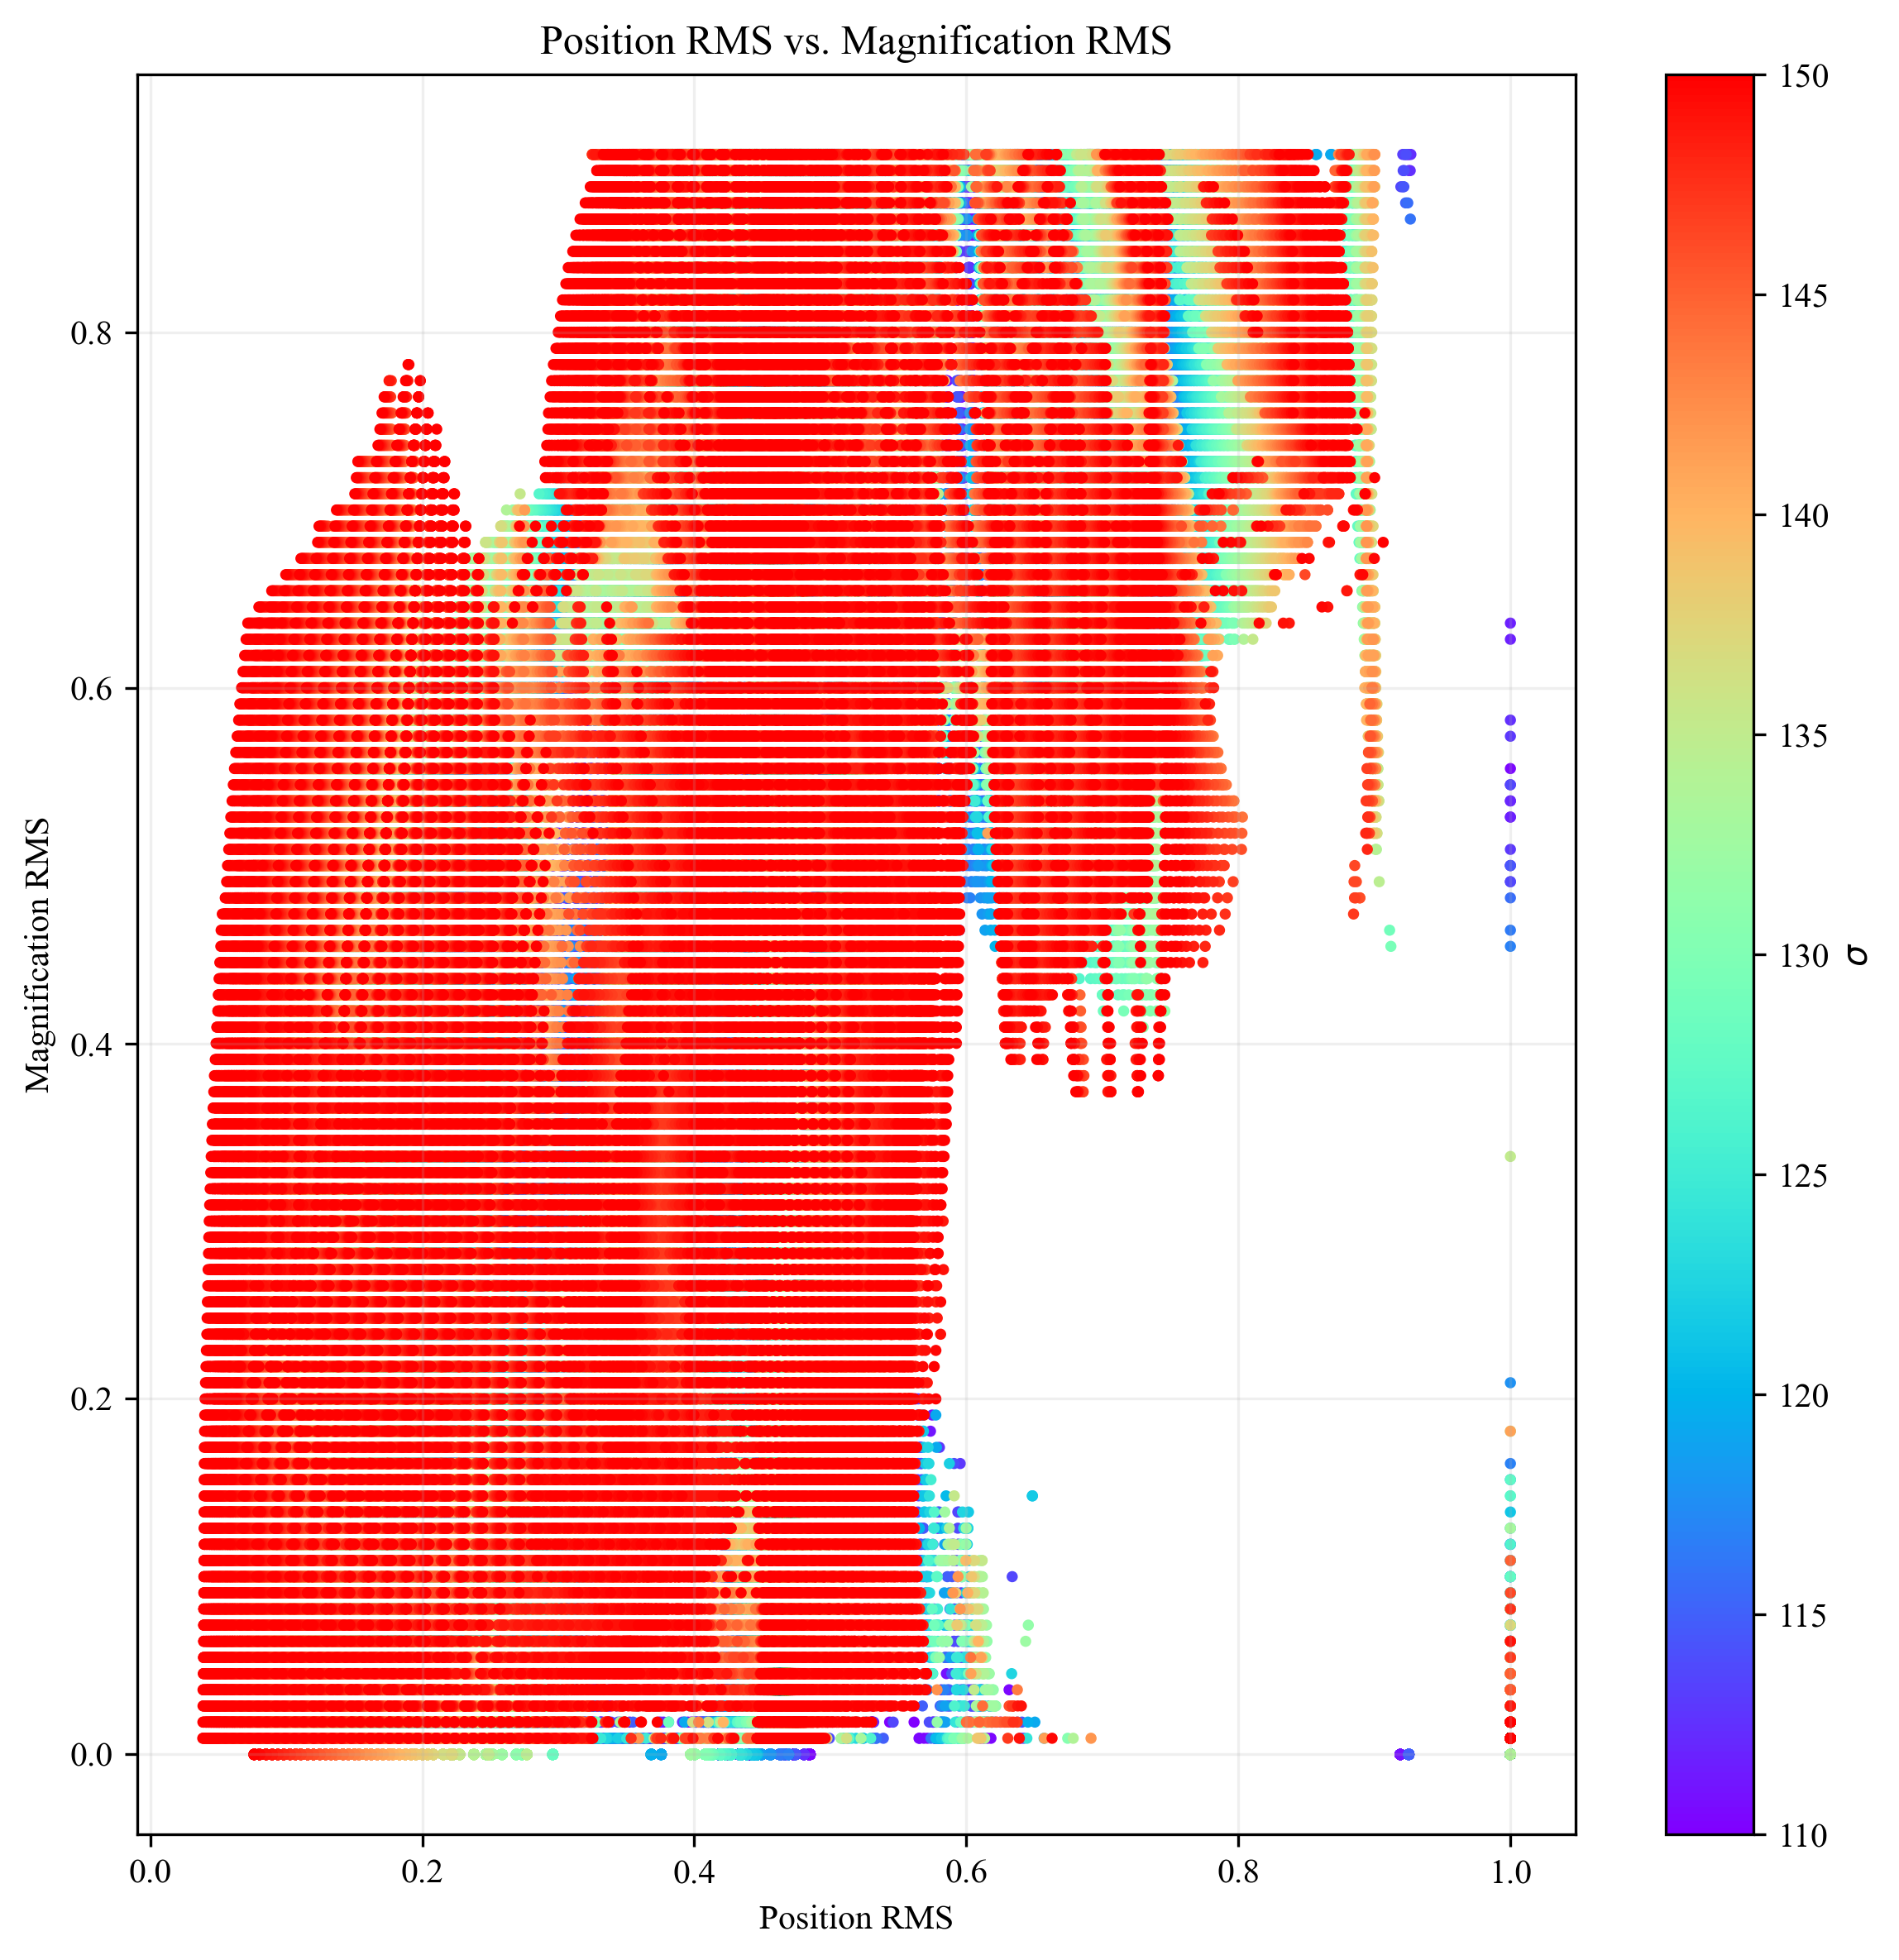

In [133]:
plt.figure(figsize=(8, 8))
plt.scatter(data['pos_rms'], data['e'], s=5, c = data['$\\sigma$'], cmap='rainbow')
plt.xlabel('Position RMS')
plt.ylabel('Magnification RMS')
# plt.ylim(0, 5)
plt.colorbar(label='$\\sigma$')
plt.title('Position RMS vs. Magnification RMS')
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()

In [53]:
# Select the variable to iterate over for the animation
variable_to_animate = '$\\sigma$'

# Select the variable to plot the KDE for
variable_to_plot = 'pos_rms' # e.g., 'pos_rms', 'mag_rms', 'chi2'

# --- The rest of the code is now general ---

# Create a directory to store the frames, named after the chosen variables
frames_dir = f'frames_kde_{variable_to_plot}_vs_{variable_to_animate}'
if os.path.exists(frames_dir):
    shutil.rmtree(frames_dir) # Clean up previous frames
os.makedirs(frames_dir)

frame_files = []
values = sorted(data[variable_to_animate].unique())

# Determine the global range for the plotted variable to keep the x-axis consistent
plot_var_min = data[variable_to_plot].min()
plot_var_max = data[variable_to_plot].max()

for i, value in enumerate(values):
    # Filter data for the current value of the chosen animation variable
    data_subset = data[data[variable_to_animate] == value]

    bins = np.linspace(0.0, 0.1, 30)

    # Skip if there's not enough data
    if data_subset.empty:
        continue

    plt.figure(figsize=(8, 4))
    plt.hist(data_subset[variable_to_plot], bins=bins, density=False, alpha=0.7, color='blue')
    
    # Set labels and a dynamic title
    plt.title(f'Histogram of {variable_to_plot} for {variable_to_animate} = {value:.2f}')
    plt.axvline(0.001, color='red', linestyle='--')
    plt.text(0.0011, 200, '$1 \\sigma$', color='red')
    plt.axvline(0.005, color='green', linestyle='--')
    plt.text(0.0051, 200, '$5 \\sigma$', color='green')
    plt.xlabel(variable_to_plot)
    plt.ylabel('Density')
    plt.xlim(0.0, 0.1) # Keep x-axis consistent
    plt.ylim(0, 240)
    plt.grid(True, alpha=0.2)
    plt.tight_layout()

    # Save the frame
    frame_path = os.path.join(frames_dir, f"frame_{i:04d}.png")
    plt.savefig(frame_path)
    plt.close()  # Close the plot to free memory
    frame_files.append(frame_path)

# Create the video from the frames
if frame_files:
    clip = mp.ImageSequenceClip(frame_files, fps=10) # Slower fps for better viewing
    video_filename = f'{SIM_NAME}_kde_{variable_to_plot}_vs_{variable_to_animate}_animation.mov'
    clip.write_videofile(video_filename, codec='libx264')
    print(f"Video saved as {video_filename}")

    # Clean up the frames directory
    shutil.rmtree(frames_dir)
else:
    print("No frames were generated to create a video.")

MoviePy - Building video Sim Neirenberg_kde_pos_rms_vs_$\sigma$_animation.mov.
MoviePy - Writing video Sim Neirenberg_kde_pos_rms_vs_$\sigma$_animation.mov



MoviePy - Done !
MoviePy - video ready Sim Neirenberg_kde_pos_rms_vs_$\sigma$_animation.mov
Video saved as Sim Neirenberg_kde_pos_rms_vs_$\sigma$_animation.mov


In [54]:
# Select the variable to iterate over for the animation
variable_to_animate = '$\\sigma$'

# Select the variable to plot the KDE for
variable_to_plot = 'mag_rms' # e.g., 'pos_rms', 'mag_rms', 'chi2'

# --- The rest of the code is now general ---

# Create a directory to store the frames, named after the chosen variables
frames_dir = f'frames_kde_{variable_to_plot}_vs_{variable_to_animate}'
if os.path.exists(frames_dir):
    shutil.rmtree(frames_dir) # Clean up previous frames
os.makedirs(frames_dir)

frame_files = []
values = sorted(data[variable_to_animate].unique())

# Determine the global range for the plotted variable to keep the x-axis consistent
plot_var_min = data[variable_to_plot].min()
plot_var_max = data[variable_to_plot].max()

for i, value in enumerate(values):
    # Filter data for the current value of the chosen animation variable
    data_subset = data[data[variable_to_animate] == value]

    bins = np.linspace(0.0, 10, 30)

    # Skip if there's not enough data
    if data_subset.empty:
        continue

    plt.figure(figsize=(8, 4))
    plt.hist(data_subset[variable_to_plot], bins=bins, density=False, alpha=0.7, color='blue')
    
    # Set labels and a dynamic title
    plt.title(f'Histogram of {variable_to_plot} for {variable_to_animate} = {value:.2f}')
    plt.axvline(1, color='red', linestyle='--')
    plt.text(1.1, 2000, '$1 \\sigma$', color='red')
    plt.axvline(5, color='green', linestyle='--')
    plt.text(5.1, 2000, '$5 \\sigma$', color='green')
    plt.xlabel(variable_to_plot)
    plt.ylabel('Density')
    plt.xlim(0.0, 10) # Keep x-axis consistent
    plt.ylim(0, 2400)
    plt.grid(True, alpha=0.2)
    plt.tight_layout()

    # Save the frame
    frame_path = os.path.join(frames_dir, f"frame_{i:04d}.png")
    plt.savefig(frame_path)
    plt.close()  # Close the plot to free memory
    frame_files.append(frame_path)

# Create the video from the frames
if frame_files:
    clip = mp.ImageSequenceClip(frame_files, fps=10) # Slower fps for better viewing
    video_filename = f'{SIM_NAME}_kde_{variable_to_plot}_vs_{variable_to_animate}_animation.mov'
    clip.write_videofile(video_filename, codec='libx264')
    print(f"Video saved as {video_filename}")

    # Clean up the frames directory
    shutil.rmtree(frames_dir)
else:
    print("No frames were generated to create a video.")

MoviePy - Building video Sim Neirenberg_kde_mag_rms_vs_$\sigma$_animation.mov.
MoviePy - Writing video Sim Neirenberg_kde_mag_rms_vs_$\sigma$_animation.mov



MoviePy - Done !
MoviePy - video ready Sim Neirenberg_kde_mag_rms_vs_$\sigma$_animation.mov
Video saved as Sim Neirenberg_kde_mag_rms_vs_$\sigma$_animation.mov
